# Model-Motivation Summary

* This version is updated on 1/12/2023

* Major updates: 
    - update refreshing memory -> encoding
    
    - add motivation check in refreshing
        if m < 0, skip refreshing
        if m > 0, like model 2, refresh
    
* Main takeaways:

    - To replicate model1, has to be n = 500, reward should be greater r=10, actr_params1={'seed':'nil', 'ans':0.2, 'egs':0.5, 'alpha':0.2, 'v':'nil', 'lf':1, 'bll':0.5, 'mas':2}
    
    - To replicate model2, has to be n < 200, otherwiaw will all becomes [1 1 11 ]
    - to replacate model1, need to make change, refresh infinite until run out of resources. work for model1. let's try model2, ans must be > 0.5, otherwise, will always be [1,1,1,1]
    - to replicate model2, actr_params2={'seed':'nil', 'ans':0.7, 'egs':0.5, 'alpha':0.2, 'v':'nil', 'lf':.5, 'bll':0.5, 'mas':2}
    
    - problem: common RT > rare RT


        

In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

#from markov_device import *
from markov_simulate_test import *
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import pandas.api.types as pdtypes

%matplotlib inline

ACT-R connection has been started.


In [3]:
model_name="markov-model3"
log_dir = '../data/model/param_simulation_%s/' % (model_name)

e=50
n=500

m_list = [0, .5, 1, 1.5, 2]
r_list = [0, 3, 5, 7, 9, 12]

param_list = []

i = 0
j = 0
for m in m_list:
    for r in r_list:   
        param_folder_id = 'param_task%d_actr%d/' % (i, j)
        task_params={'REWARD': {'B1': r, 'B2': r, 'C1': r, 'C2': r}, 'M':m}  
        actr_params={'ans':0.2, 'egs':0.2, 'alpha':0.5, 'v':'nil', 'lf':1, 'bll':0.5, 'mas':2}
        simulate_stay_probability(model=model_name, epoch=e, n=n, task_params=task_params, actr_params=actr_params, log='%s%s' % (log_dir, param_folder_id))
        j += 1
        print('COMPLETE PARAMID %s' % (param_folder_id))

COMPLETE PARAMID param_task0_actr0/
COMPLETE PARAMID param_task0_actr1/
COMPLETE PARAMID param_task0_actr2/
COMPLETE PARAMID param_task0_actr3/
COMPLETE PARAMID param_task0_actr4/
COMPLETE PARAMID param_task0_actr5/
COMPLETE PARAMID param_task0_actr6/


KeyError: "The following 'id_vars' are not present in the DataFrame: ['received_reward', 'state2_selected_stimulus']"

In [3]:
load = False

if load:
    pass 
    
else:
    df31, df31_state1stay, df31_utrace, df31_atrace = simulate_stay_probability(model=model_name, epoch=e, n=n1, task_params=task_params1, actr_params=actr_params1)
    df32, df32_state1stay, df32_utrace, df32_atrace = simulate_stay_probability(model=model_name, epoch=e, n=n2, task_params=task_params2, actr_params=actr_params2)
    
    # test
    # df32, df32_state1stay, df32_utrace, df32_atrace = df31, df31_state1stay, df31_utrace, df31_atrace
    # df31, df31_state1stay, df31_utrace, df31_atrace = df32, df32_state1stay, df32_utrace, df32_atrace

>>>>>>>>> SIMULATION REWARD GAINED <<<<<<<<<< 	 EPOCH: 10
GAINED R: 2.25 (EXPECTED R: 2.53) 	 [88.95 %]




...RUNNING TIME [45.53] (s)...
>>>>>>>>> SIMULATION REWARD GAINED <<<<<<<<<< 	 EPOCH: 10
GAINED R: 0.42 (EXPECTED R: 2.80) 	 [14.90 %]




...RUNNING TIME [16.57] (s)...


## Stay Probability

In [4]:
df31stay_aggregate  = df31_state1stay.groupby(['epoch', 'received_reward', 'state_frequency']).agg(state1_stay_mean=('state1_stay', 'mean'),
                                                                                        state1_stay_sd=('state1_stay', 'std'),
                                                                                        state1_stay_se=('state1_stay', 'sem')).reset_index()

df32stay_aggregate  = df32_state1stay.groupby(['epoch', 'received_reward', 'state_frequency']).agg(state1_stay_mean=('state1_stay', 'mean'),
                                                                                        state1_stay_sd=('state1_stay', 'std'),
                                                                                        state1_stay_se=('state1_stay', 'sem')).reset_index()


In [5]:
my_palette = sns.color_palette(["#4374B3", "#FF0B04"])


if load:
    fig, ax = plt.subplots(figsize=(6,4))
    fig.suptitle('Model-Free: Stay Probability')
    sns.barplot(data=df1_state1stay, x='received_reward', y='state1_stay', 
                hue='state_frequency', 
                palette=my_palette, alpha=.5, 
                order = sorted(df1stay_aggregate['received_reward'].unique(), reverse=True), 
                hue_order=['common', 'rare'])

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    ax.axhline(0.5, color='grey', ls='-.', linewidth=.5) 
    plt.show()

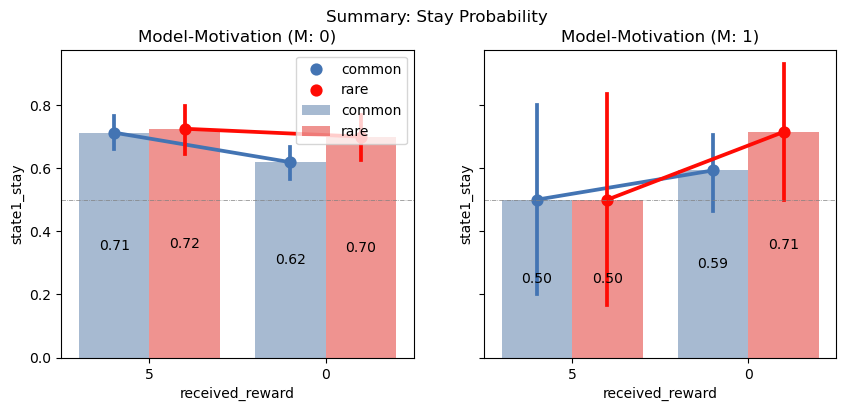

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
fig.suptitle('Summary: Stay Probability')
sns.barplot(data=df31_state1stay, x='received_reward', y='state1_stay',
            hue='state_frequency', palette=my_palette, alpha=.5,
            order = sorted(df31_state1stay['received_reward'].dropna().unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[0]) 
sns.pointplot(data=df31_state1stay, x='received_reward', y='state1_stay',  dodge=0.4,
            hue='state_frequency', 
            palette=my_palette, 
            order = sorted(df31_state1stay['received_reward'].dropna().unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[0]) 

sns.barplot(data=df32_state1stay, x='received_reward', y='state1_stay',
            hue='state_frequency', palette=my_palette, alpha=.5,
            order = sorted(df32_state1stay['received_reward'].dropna().unique(), reverse=True), 
            hue_order=['common', 'rare'], errorbar=None,
            ax=axes[1]) 
sns.pointplot(data=df32_state1stay, x='received_reward', y='state1_stay',  dodge=0.4,
            hue='state_frequency', 
            palette=my_palette, 
            order = sorted(df32_state1stay['received_reward'].dropna().unique(), reverse=True), 
            hue_order=['common', 'rare'],
            ax=axes[1]) 

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')
    ax.axhline(0.5, color='grey', ls='-.', linewidth=.5)    

axes[0].legend(loc=1)
axes[1].legend_.remove() 
axes[0].set_title('Model-Motivation (M: %.d)' % (df31['m_parameter'].unique()[0]))
axes[1].set_title('Model-Motivation (M: %.d)' % (df32['m_parameter'].unique()[0]))

plt.show()


## Simulation Results: Effect

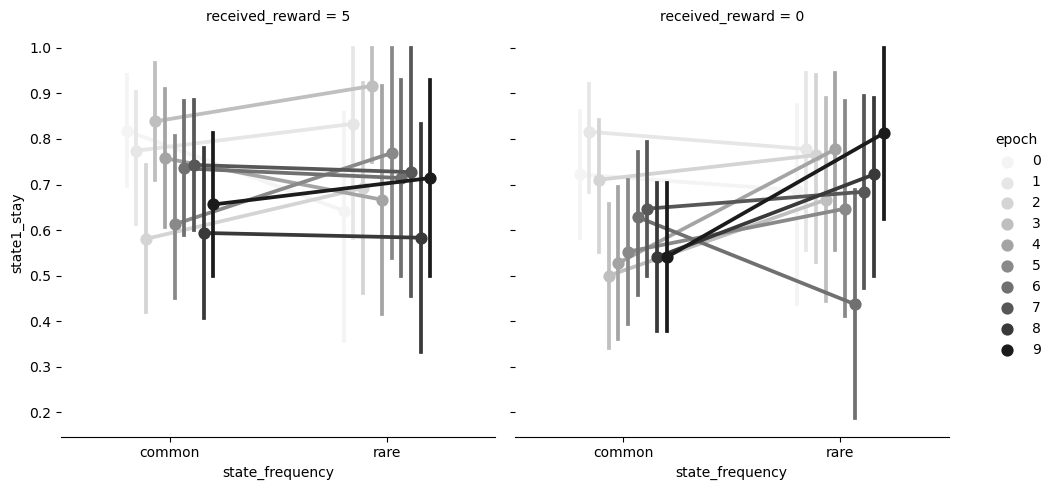

In [7]:
ax = sns.catplot(data=df31_state1stay, x='state_frequency', y='state1_stay', kind='point',
            row=None, col='received_reward', col_order = sorted(df31_state1stay['received_reward'].unique(), reverse=True), 
            margin_titles=True, hue='epoch', palette='Greys', dodge=.4) 
# ax.set(ylim=(0.5,1))
ax.despine(left=True)
plt.show()

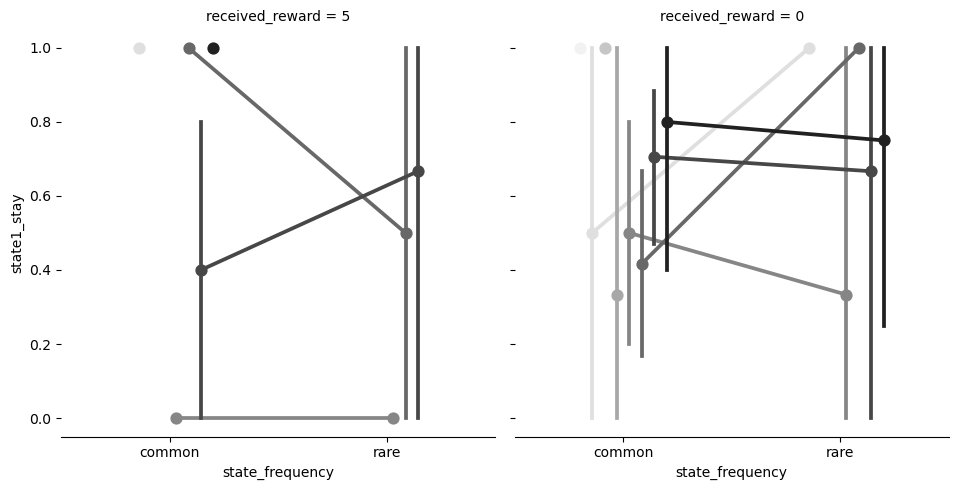

In [8]:
ax = sns.catplot(data=df32_state1stay, x='state_frequency', y='state1_stay', kind='point',
            row=None, col='received_reward', col_order = sorted(df32_state1stay['received_reward'].unique(), reverse=True), 
            margin_titles=True, hue='epoch', palette='Greys', dodge=.4) 
# ax.set(ylim=(0.7, 1))
ax.despine(left=True)
ax._legend.remove()
plt.show()

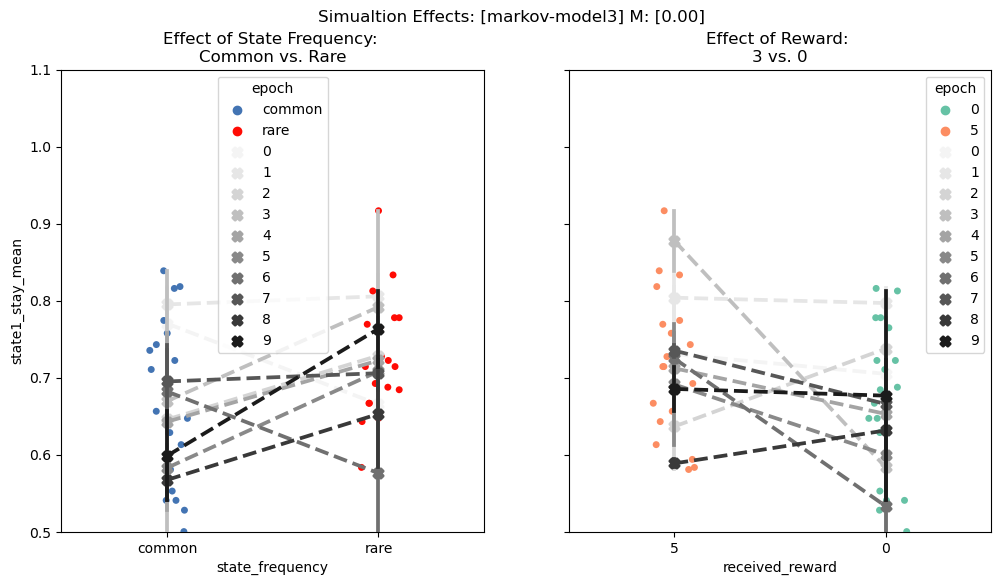

In [9]:
reward_order=df31stay_aggregate['received_reward'].sort_values(ascending=False).unique()

fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)
fig.suptitle('Simualtion Effects: [%s] M: [%.2f]' % (model_name, task_params1['M']))

    
sns.stripplot(data=df31stay_aggregate, x='state_frequency', y='state1_stay_mean', 
            order=['common', 'rare'],  hue='state_frequency', palette=my_palette, ax=axes[0])
sns.pointplot(data=df31stay_aggregate, x='state_frequency', y='state1_stay_mean', 
              order=['common', 'rare'],  hue='epoch', palette='Greys', 
              markers='X', linestyles='--', ax=axes[0]) 

sns.stripplot(data=df31stay_aggregate, x='received_reward', y='state1_stay_mean', 
              order=reward_order,  hue='received_reward', palette='Set2', ax=axes[1])
sns.pointplot(data=df31stay_aggregate, x='received_reward', y='state1_stay_mean', 
              order=reward_order,  hue='epoch', palette='Greys', 
              markers='X', linestyles='--', ax=axes[1]) 

axes[0].set_ylim(0.5,1.1)
axes[0].set_title('Effect of State Frequency: \nCommon vs. Rare')
axes[1].set_title('Effect of Reward: \n3 vs. 0')
plt.show()

/home/chery/.conda/envs/pyactrr/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/chery/.conda/envs/pyactrr/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/chery/.conda/envs/pyactrr/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/chery/.conda/envs/pyactrr/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/chery/.conda/envs/pyactrr/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/home/chery/.conda/envs/pyactrr/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_

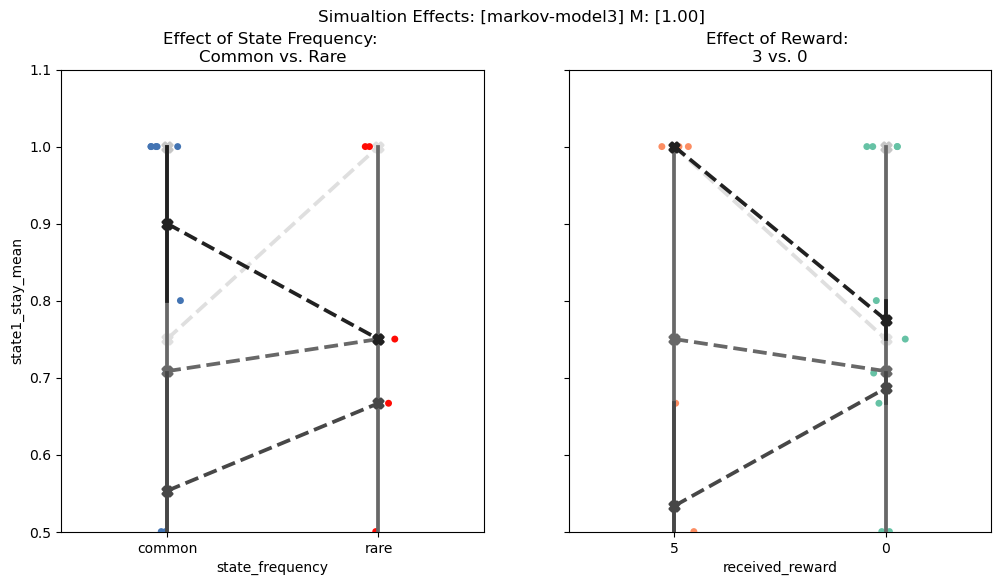

In [10]:
fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)
fig.suptitle('Simualtion Effects: [%s] M: [%.2f]' % (model_name, task_params2['M']))
    
sns.stripplot(data=df32stay_aggregate, x='state_frequency', y='state1_stay_mean', 
            order=['common', 'rare'],  hue='state_frequency', palette=my_palette, ax=axes[0])
sns.pointplot(data=df32stay_aggregate, x='state_frequency', y='state1_stay_mean', 
              order=['common', 'rare'],  hue='epoch', palette='Greys', 
              markers='X', linestyles='--', ax=axes[0]) 

sns.stripplot(data=df32stay_aggregate, x='received_reward', y='state1_stay_mean', 
              order=reward_order,  hue='received_reward', palette='Set2', ax=axes[1])
sns.pointplot(data=df32stay_aggregate, x='received_reward', y='state1_stay_mean', 
              order=reward_order,  hue='epoch', palette='Greys', 
              markers='X', linestyles='--', ax=axes[1]) 

axes[0].set_ylim(0.5,1.1)
axes[0].set_title('Effect of State Frequency: \nCommon vs. Rare')
axes[1].set_title('Effect of Reward: \n3 vs. 0')
axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.show()

## Response Time

### RT by State Frequency

In [11]:
df31['response_time'] = df31.apply(lambda x:x['state1_response_time'] + x['state2_response_time'], axis=1)
df32['response_time'] = df32.apply(lambda x:x['state1_response_time'] + x['state2_response_time'], axis=1)

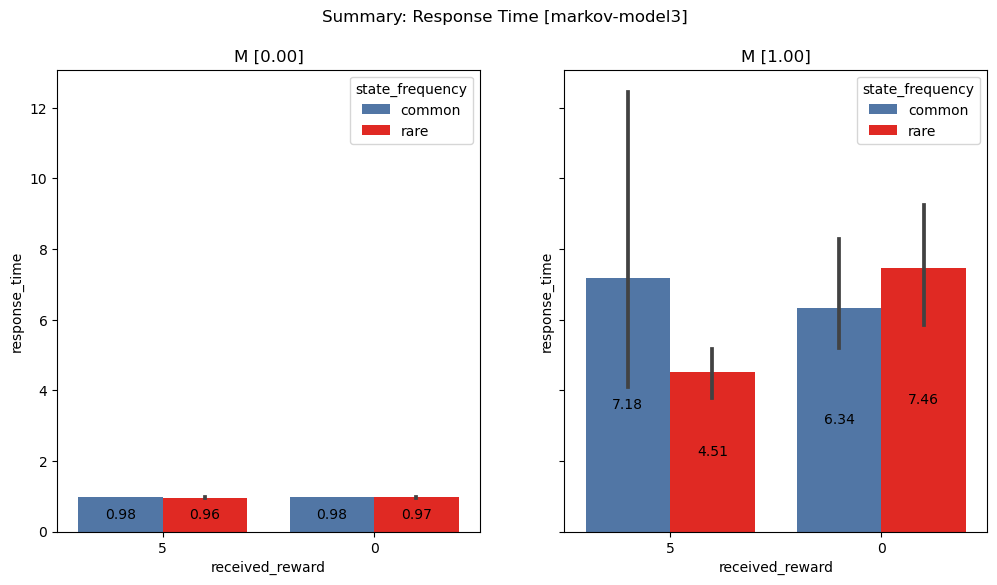

In [12]:
my_palette2 = sns.color_palette(["#0b5394", "#D9534F", "#9fc5e8", "#ECA9A7"])
hue_order = ['state1:common', 'state1:rare', 'state2:common', 'state2:rare']

reward_order= df31['received_reward'].dropna().sort_values(ascending=False).unique()

fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True, sharex=True)
fig.suptitle('Summary: Response Time [%s] ' % (model_name))

sns.barplot(data=df31, x='received_reward', y='response_time',  hue='state_frequency', 
            order=reward_order, hue_order=['common', 'rare'], palette=my_palette, ax=axes[0])
sns.barplot(data=df32, x='received_reward', y='response_time',  hue='state_frequency', 
            order=reward_order, hue_order=['common', 'rare'], palette=my_palette, ax=axes[1])

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')    
axes[0].set_title('M [%.2f]' % (m1))
axes[1].set_title('M [%.2f]' % (m2)) 
plt.show()

In [13]:
df31_long = df31[['received_reward', 'state_frequency', 'state1_response_time', 'state2_response_time']].melt(id_vars=['received_reward', 'state_frequency'], value_vars=['state1_response_time', 'state2_response_time'], var_name='state_name', value_name='response_time')
df31_long['state'] = df31_long.apply(lambda x: x['state_name'].split('_')[0]+':'+x['state_frequency'], axis=1)

df32_long = df32[['epoch', 'received_reward', 'state_frequency', 'state1_response_time', 'state2_response_time']].melt(id_vars=['epoch', 'received_reward', 'state_frequency'], value_vars=['state1_response_time', 'state2_response_time'], var_name='state_name', value_name='response_time')
df32_long['state'] = df32_long.apply(lambda x: x['state_name'].split('_')[0]+':'+x['state_frequency'], axis=1)

In [14]:
# df32_long_agg = df32_long.groupby(['epoch', 'received_reward', 'state']).mean().reset_index() 

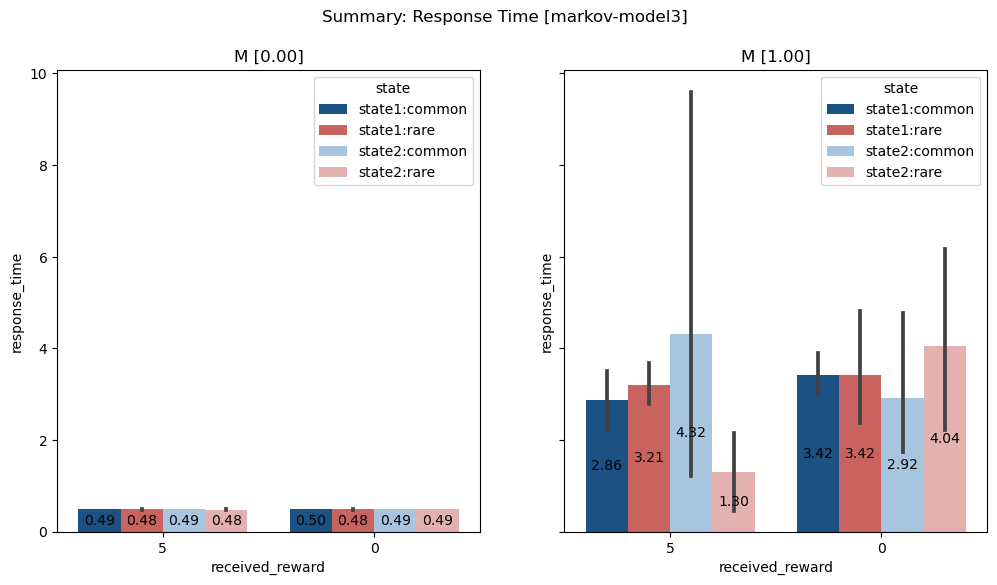

In [15]:
my_palette2 = sns.color_palette(["#0b5394", "#D9534F", "#9fc5e8", "#ECA9A7"])
hue_order = ['state1:common', 'state1:rare', 'state2:common', 'state2:rare']

fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True, sharex=True)
fig.suptitle('Summary: Response Time [%s] ' % (model_name))

sns.barplot(data=df31_long, x='received_reward', y='response_time', 
            hue='state', palette=my_palette2,
            order = sorted(df31_long['received_reward'].unique(), reverse=True), 
            hue_order=hue_order, ax=axes[0])
sns.barplot(data=df32_long, x='received_reward', y='response_time', 
            hue='state', palette=my_palette2,
            order = sorted(df32_long['received_reward'].unique(), reverse=True), 
            hue_order=hue_order, ax=axes[1])

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')    
axes[0].set_title('M [%.2f]' % (m1))
axes[1].set_title('M [%.2f]' % (m2)) 
plt.show()

### RT by Reward Frequency


pre_reward_frequency: whether the reward probability of previous trial is common/rare

In [16]:
df31['pre_reward_frequency'] = df31['reward_frequency'].shift(1)
df32['pre_reward_frequency'] = df32['reward_frequency'].shift(1)

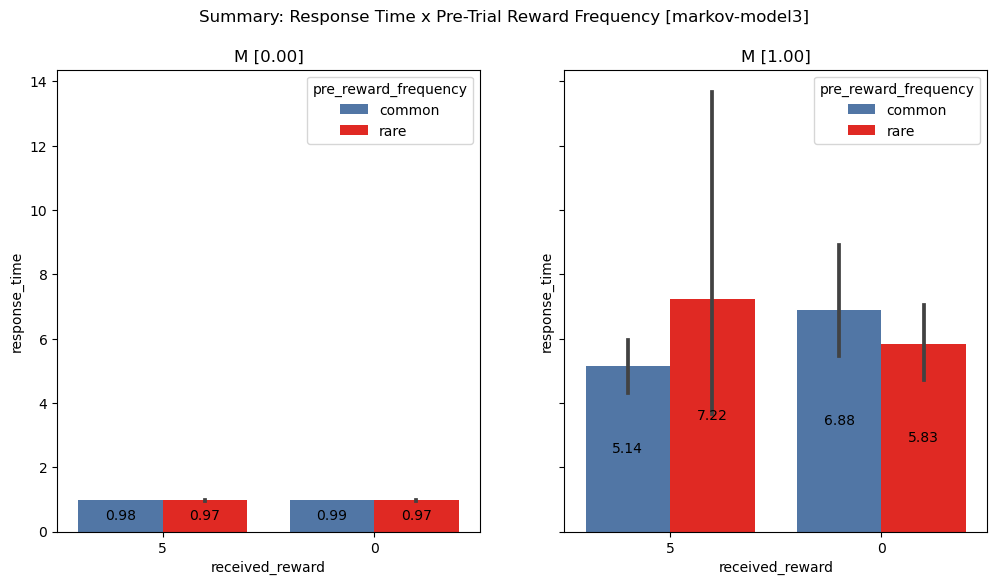

In [17]:
my_palette2 = sns.color_palette(["#0b5394", "#D9534F", "#9fc5e8", "#ECA9A7"])
hue_order = ['state1:common', 'state1:rare', 'state2:common', 'state2:rare']

reward_order= df31['received_reward'].dropna().sort_values(ascending=False).unique()

fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True, sharex=True)
fig.suptitle('Summary: Response Time x Pre-Trial Reward Frequency [%s] ' % (model_name))

sns.barplot(data=df31, x='received_reward', y='response_time',  hue='pre_reward_frequency', 
            order=reward_order, hue_order=['common', 'rare'], palette=my_palette, ax=axes[0])
sns.barplot(data=df32, x='received_reward', y='response_time',  hue='pre_reward_frequency', 
            order=reward_order, hue_order=['common', 'rare'], palette=my_palette, ax=axes[1])

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')    
axes[0].set_title('M [%.2f]' % (m1))
axes[1].set_title('M [%.2f]' % (m2)) 
plt.show()

### RT by Previous State Frequency


pre_reward_frequency: whether the reward probability of previous trial is common/rare

In [18]:
df31['pre_state_frequency'] = df31['state_frequency'].shift(1)
df32['pre_state_frequency'] = df32['state_frequency'].shift(1)

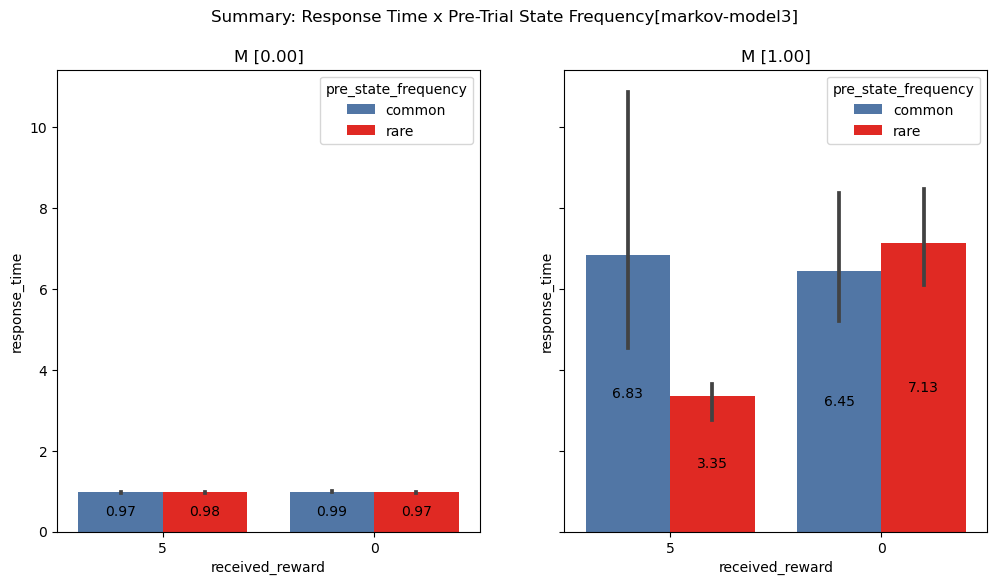

In [19]:
fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True, sharex=True)
fig.suptitle('Summary: Response Time x Pre-Trial State Frequency[%s] ' % (model_name))

sns.barplot(data=df31, x='received_reward', y='response_time',  hue='pre_state_frequency', 
            order=reward_order, hue_order=['common', 'rare'], palette=my_palette, ax=axes[0])
sns.barplot(data=df32, x='received_reward', y='response_time',  hue='pre_state_frequency', 
            order=reward_order, hue_order=['common', 'rare'], palette=my_palette, ax=axes[1])

for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center')    
axes[0].set_title('M [%.2f]' % (m1))
axes[1].set_title('M [%.2f]' % (m2)) 
plt.show()

# Learning Performance

In [20]:
if load:
    df1_aggregate  = df1.groupby(['index_bin']).agg(optimal_response_sum_prop=('optimal_response_sum_prop', 'mean')).reset_index()

    ax=sns.lineplot(data=df1_aggregate, x='index_bin', y='optimal_response_sum_prop', label='Model-Free (Performance)', color='steelblue', marker='o', lw=3)
    ax.axhline(0.5, color='grey', ls='-.', linewidth=.5) 
    ax.set_ylim(0,1)
    plt.title('MODEL-FREE')
    plt.show()

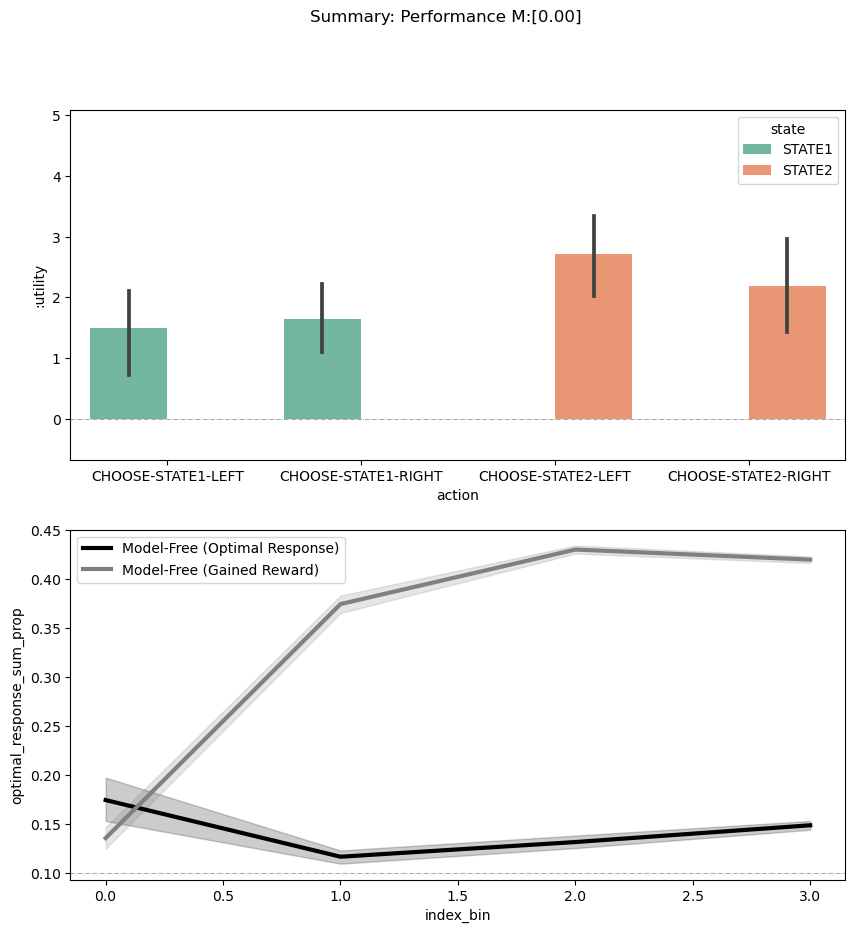

In [21]:
if not load:
    # model3 - 1
    fig, axes = plt.subplots(2,1, figsize=(10,10))
    fig.suptitle('Summary: Performance M:[%.2f]' % (m1))

    #plot
    sns.barplot(data=df31_utrace, x='action', y=':utility', hue='state', palette='Set2', ax=axes[0])
    axes[0].axhline(0, color='grey', ls='-.', linewidth=.5) 
    axes[0].set_ylim(df31_utrace[':utility'].min()*1.15, df31_utrace[':utility'].max()*1.15) 
    
    sns.lineplot(data=df31, x='index_bin', y='optimal_response_sum_prop', label='Model-Free (Optimal Response)', color='black', lw=3, ax=axes[1])
    sns.lineplot(data=df31, x='index_bin', y='received_reward_sum_prop', label='Model-Free (Gained Reward)', color='gray', lw=3,  ax=axes[1])
    axes[1].axhline(0.1, color='grey', ls='-.', linewidth=.5) 
    axes[0].set_ylim(df31_utrace[':utility'].min()*1.15, df31_utrace[':utility'].max()*1.15)
    
    axes[0].set_title('')
    axes[1].set_title('')
    
    plt.show()

/home/chery/.conda/envs/pyactrr/lib/python3.9/site-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

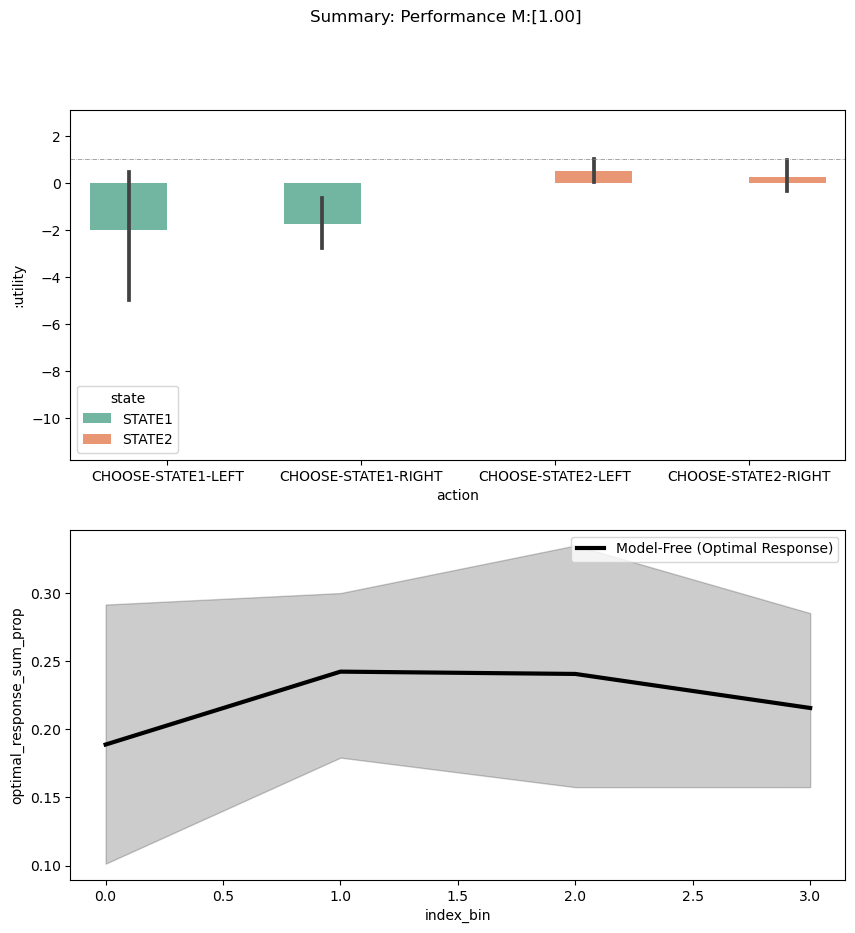

In [22]:
if not load:
    # model3 - 2
    fig, axes = plt.subplots(2,1, figsize=(10,10))
    fig.suptitle('Summary: Performance M:[%.2f]' % (m2))

    #plot
    sns.barplot(data=df32_utrace, x='action', y=':utility', hue='state', palette='Set2', ax=axes[0])
    axes[0].axhline(1, color='grey', ls='-.', linewidth=.5) 
    axes[0].set_ylim(df32_utrace[':utility'].min()*1.15, df32_utrace[':utility'].max()*1.15) 
    
    sns.lineplot(data=df32, x='index_bin', y='optimal_response_sum_prop', label='Model-Free (Optimal Response)', color='black', lw=3, ax=axes[1])
    sns.lineplot(data=df32, x='index_bin', y='received_reward_sum_prop', label='Model-Free (Gained Reward)', color='gray', lw=3,  ax=axes[1])
    axes[0].axhline(1, color='grey', ls='-.', linewidth=.5) 
    axes[0].set_ylim(df32_utrace[':utility'].min()*1.15, df32_utrace[':utility'].max()*1.15)
    
    axes[0].set_title('')
    axes[1].set_title('')
    
    plt.show()

## Reward Probabilities

In [ ]:
dfr = df31[['index', 'reward_probability_B1', 'reward_probability_B2', 'reward_probability_C1', 'reward_probability_C2']].melt(id_vars='index', var_name='state2_stimulus', value_name='reward_probability')
dfr['state2_stimulus'] = dfr.apply(lambda x:x['state2_stimulus'].split('_')[-1], axis=1)
dfr.head()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
fig.suptitle('Reward Probabilities [Random Walk]')
ax = sns.lineplot(dfr, x='index', y='reward_probability', hue='state2_stimulus', markers='state1_stimulus')

## Activation Trace

In [ ]:
# state1_selected_stimulus, state2_selected_stimulus, state1_response, 
# A, B, f -> M-A1
# A, B, k -> M-A2
# A, C, f -> M-A2
# A, C, k -> M-A4

# state2_selected_stimulus, state2_response, received_reward, 
# B1, f, 3 -> M-B1
# B1, f, 0 -> M-B2
# B2, k, 3 -> M-B3
# B2, k, 0 -> M-B4 

# C1, f, 3 -> M-C1
# C1, f, 0 -> M-C2
# C2, k, 3 -> M-C3
# C2, k, 0 -> M-C4 

def map_func1(x):
    a,b,c,d,e = x['state1_selected_stimulus'], x['state2_selected_stimulus'], x['state1_response'], x['state2_response'], x['received_reward']
    if a[0] == 'A' and b[0] == 'B' and c == 'f':
        return 'M-A1'
    if a[0] == 'A' and b[0] == 'B' and c == 'k':
        return 'M-A2'
    if a[0] == 'A' and b[0] == 'C' and c == 'f':
        return 'M-A3'
    if a[0] == 'A' and b[0] == 'C' and c == 'k':
        return 'M-A4'

def map_func2(x):
    a,b,c,d,e = x['state1_selected_stimulus'], x['state2_selected_stimulus'], x['state1_response'], x['state2_response'], x['received_reward']
    if b == 'B1' and d == 'f' and e == 3:
        return 'M-B1'
    if b == 'B1' and d == 'f' and e == 0:
        return 'M-B2'
    if b == 'B2' and d == 'k' and e == 3:
        return 'M-B3'
    if b == 'B2' and d == 'k' and e == 0:
        return 'M-B4'
    
    if b == 'C1' and d == 'f' and e == 3:
        return 'M-C1'
    if b == 'C1' and d == 'f' and e == 0:
        return 'M-C2'
    if b == 'C2' and d == 'k' and e == 3:
        return 'M-C3'
    if b == 'C2' and d == 'k' and e == 0:
        return 'M-C4'

df31m = df31.copy()
df32m = df32.copy()

df31m['state1_memory'] = df31.apply(map_func1, axis=1)
df31m['state2_memory'] = df31.apply(map_func2, axis=1)

df32m['state1_memory'] = df32.apply(map_func1, axis=1)
df32m['state2_memory'] = df32.apply(map_func2, axis=1)

df31m_count = pd.concat([df31m.groupby(['epoch', 'state1_memory'])['index'].count().reset_index().rename(columns={'state1_memory':'memory', 'index':'trial_count'}), 
           df31m.groupby(['epoch', 'state2_memory'])['index'].count().reset_index().rename(columns={'state2_memory':'memory', 'index':'trial_count'})], axis=0)
df32m_count = pd.concat([df32m.groupby(['epoch', 'state1_memory'])['index'].count().reset_index().rename(columns={'state1_memory':'memory', 'index':'trial_count'}), 
           df32m.groupby(['epoch', 'state2_memory'])['index'].count().reset_index().rename(columns={'state2_memory':'memory', 'index':'trial_count'})], axis=0)

In [ ]:
reward_palette1 = sns.color_palette(['#f4cccc', '#882724'])
my_chunk_palette = sns.color_palette(["#9a8900", "#ffe500", "#ffe500", "#9a8900"]+['#882724', '#f4cccc']*4)
chunk_order = df31_atrace['memory'].sort_values().unique()

fig, axes = plt.subplots(3,1, figsize=(15,12), sharex=True)
fig.suptitle('Summary: ACT-R Memory Trace M: [%.2f]' % (m1))
sns.barplot(data = df31_atrace, x='memory', y=':Reference-Count', order=chunk_order, palette=my_chunk_palette, ax=axes[0])
sns.barplot(data =df31_atrace, x='memory', y=':Activation', alpha=.7, order=chunk_order, palette=my_chunk_palette, errorbar='se', ax=axes[1])
sns.barplot(data=df31m_count, x='memory', y='trial_count', order=chunk_order, palette=my_chunk_palette, ax=axes[2])


axes[0].legend(labelcolor=['#9a8900', '#f4cccc', '#ffe500', '#9a8900'], labels=['Reward', 'Non-Reward', 'Rare', 'Common'])
axes[0].set_title('ACTR Trace: :Retrieval-Count') 
axes[1].set_title('ACTR Trace: :Activation') 
axes[2].set_title('Experiment Trial Count') 
plt.show()

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(15,12), sharex=True)
fig.suptitle('Summary: ACT-R Memory Trace M: [%.2f]' % (m2))
sns.barplot(data = df32_atrace, x='memory', y=':Reference-Count', order=chunk_order, palette=my_chunk_palette, ax=axes[0])
sns.barplot(data =df32_atrace, x='memory', y=':Activation', alpha=.7, order=chunk_order, palette=my_chunk_palette, errorbar='se', ax=axes[1])
sns.barplot(data=df32m_count, x='memory', y='trial_count', order=chunk_order, palette=my_chunk_palette, ax=axes[2])


axes[0].legend(labelcolor=['#9a8900', '#f4cccc', '#ffe500', '#9a8900'], labels=['Reward', 'Non-Reward', 'Rare', 'Common'])
axes[0].set_title('ACTR Trace: :Retrieval-Count') 
axes[1].set_title('ACTR Trace: :Activation') 
axes[2].set_title('Experiment Trial Count') 
plt.show()